> TOC
```
Step 1. Matplotlib
     1-1. subplots
     1-2. subplots with for-loop
     1-3. fill_between
     1-4. alpha
     1-5. line plot + fill_between
     1-6. axvline
     1-7. axvspan
Step 2. Time Series
     2-1. get stock data
     2-2. draw yearly stock trends with subplots
     2-3. time series decomposition
     2-4. auto-correlation, partial auto-correlation
```

## Step 1. Matplotlib

데이터를 시각화하는 도구는 여러 가지가 있습니다. 특히 시계열 데이터의 경우 엑셀이나 스프레드시트, PPT만으로도 충분히 의도하는 내용을 차트로 만들어낼 수 있습니다. 따라서 '굳이' 파이썬으로 시각화를 하고자 한다면 단순히 파이썬으로 분석, 시각화까지 이어서 진행할 수 있는 연속성 외에도 파이썬이 주는 자유도와 자동화로 인한 편의를 충분히 활용해야 합니다. ​

파이썬을 사용하면 반복문과 함수를 손쉽게 활용하고, 프로그래밍을 통해 여러 차트를 동시에 그려낼 수 있습니다. matplotlib을 사용하면 이러한 작업을 편하게 수행할 수 있습니다.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
np.linspace(1,10,10)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

### 1-1. subplots

subplots()를 사용하면 전체 레이아웃을 m행, n열로 구분하여 각각 구분된 영역에 그래프를 그릴 수 있습니다.

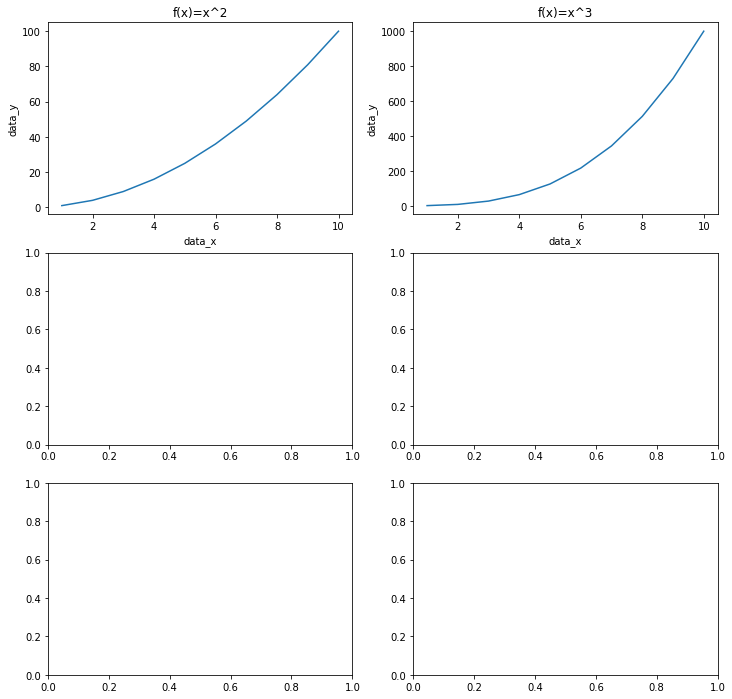

In [105]:
fig = plt.figure(figsize=(12,12))

## 1.
axes = fig.subplots(nrows=3, ncols=2)

## 2.
data_x = np.linspace(1,10,10)
data_y = data_x**2
axes[0,0].plot(data_x, data_y)

## 3.
axes[0,0].set_xlabel('data_x')
axes[0,0].set_ylabel('data_y')
axes[0,0].set_title('f(x)=x^2')


## 4.
data_y = data_x**3
axes[0,1].plot(data_x, data_y)
axes[0,1].set_xlabel('data_x')
axes[0,1].set_ylabel('data_y')
axes[0,1].set_title('f(x)=x^3')


plt.show()

코드 흐름은 아래와 같습니다.

- 먼저 전체 레이아웃을 figsize=(12,12)로 설정해서 가로, 세로가 동일(12)한 사이즈의 공간을 마련합니다. 
- 공간을 3행 2열의 작은 subplot으로 나눠주고, 각 subplot에는 axes 변수로 접근할 수 있도록 합니다.
- np.linspace(1, 10, 10)으로 1부터 10까지 10(3번째 인자)개 구간으로 나눠 데이터를 생성합니다. 그럼 data_x에는 array([1,2,3,4,5,6,7,8,9,10]) 이 들어가고, 각 요소의 타입은 float입니다. 
- data_y는 data_x의 모든 요소에 대해 2승한 값을 넣어줍니다.
- data_x, data_y로 첫 번째 행, 첫 번째 열에 위치한 subplot axes[0,0]에 차트를 그려줍니다.
- 해당 subplot에는 set_xlabel(), set_ylabel() 함수로 각각 x축 이름, y 축 이름을 설정해 주고, set_title() 함수로 subplot 이름을 해당 subplot 상단에 표시해 줍니다.
- 첫 번째 행, 두 번째 열에 위치한 subplot axes[0,1]에는 위 방식으로 차트를 그리되, data_y는 data_x 요소들을 모두 3승한 값을 넣어줍니다.
- 마지막으로 plt.show() 함수로 전체 subplot을 함께 그립니다.

​

### 1-2. subplots with for-loop

그런데, 이런 방식으로 6개의 subplot을 모두 그리기에는 너무 번거롭습니다. 따라서 우리는 반복문을 사용해 1~10까지의 정수(float type이지만 소수점 이하 0을 생략하여 정수라는 표현을 사용하겠습니다.)를 2승, 3승 ~ 7승한 그래프를 각 subplot에 순서대로 그려보겠습니다.

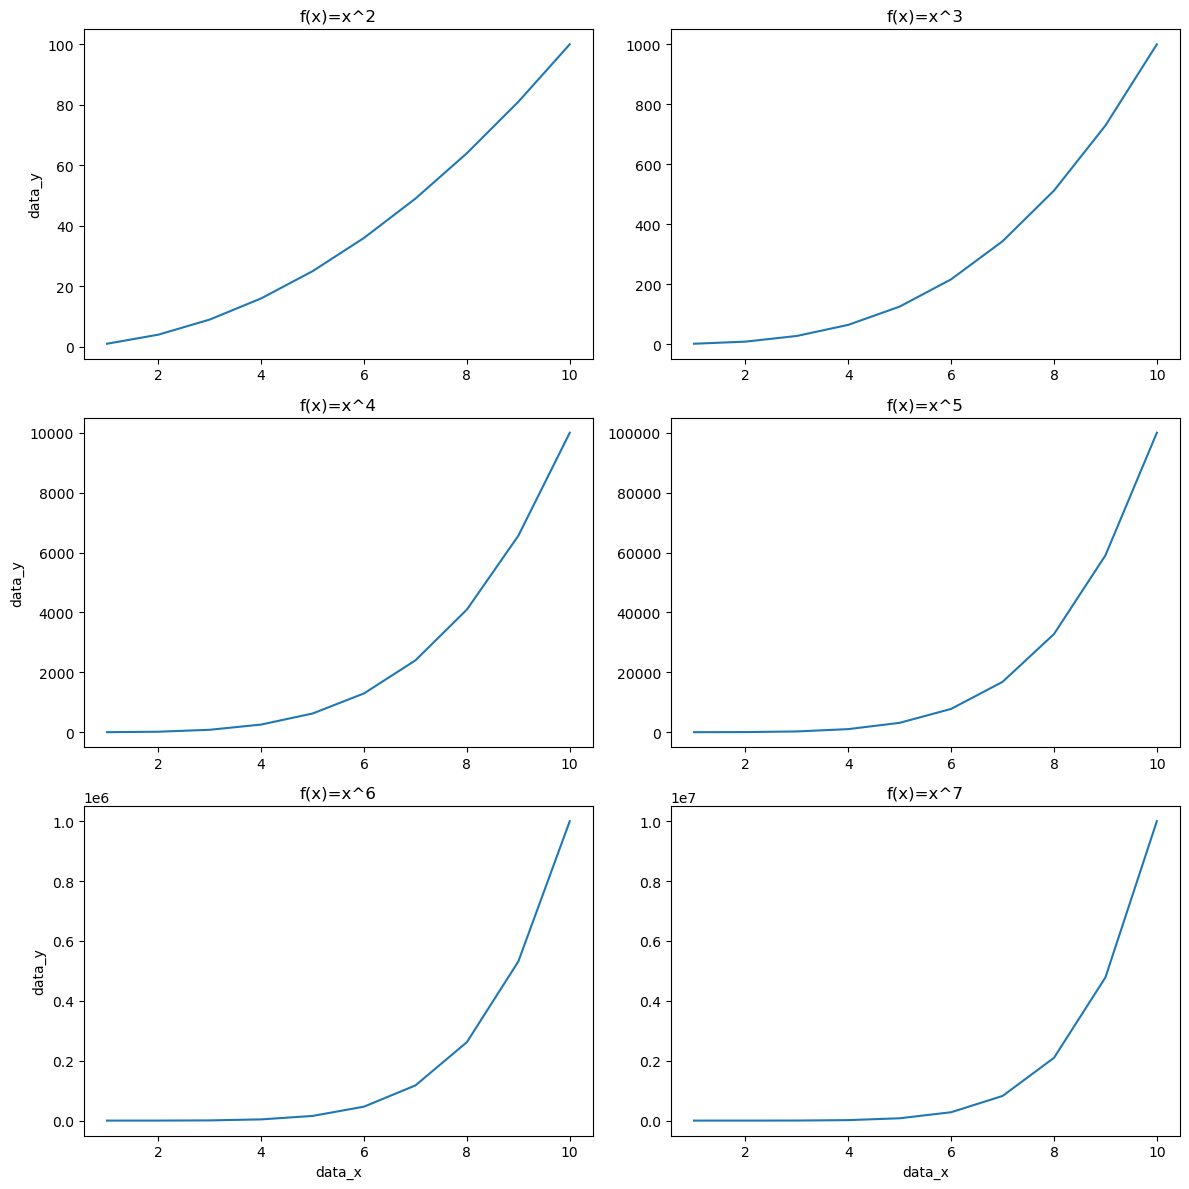

In [6]:
fig = plt.figure(figsize=(12,12))

## 1.
axes = fig.subplots(nrows=3, ncols=2)

data_x = np.linspace(1,10,10)
a,b = axes.shape

## 2.
for i in range(a*b):
  data_y = data_x**(i+2) # ^2, ^3, ... , ^7
  nrow = i // 2
  ncol = i % 2
  axes[nrow, ncol].plot(data_x, data_y) # (0,0), (0,1), (1,0), (1,1), (2,0), (2,1)
  if ncol == 0:
    axes[nrow, ncol].set_ylabel('data_y')
  if nrow == 2:
    axes[nrow, ncol].set_xlabel('data_x')
  axes[nrow,ncol].set_title(f'f(x)=x^{i+2}')

plt.tight_layout()
plt.show()

axes.shape이 (3,2)이므로 a*b는 6입니다. 따라서 for i in range(a*b) 반복문을 통해 i는 0부터 5까지 1씩 증가합니다. i가 1씩 증가하면 i를 2로 나눈 몫은 순서대로 0, 0, 1, 1, 2, 2가 되고, i를 2로 나눈 나머지는 0, 1, 0, 1, 0, 1이 됩니다. 둘을 각각 행의 번호, 열의 번호로 지정하고, 첫 번째 subplot부터 마지막 subplot까지 순회하며 차트를 그려나갑니다.

In [9]:
for i in range(a*b):
  print(f'i: {i}, i//2: {i//2}, i%2: {i%2}')

i: 0, i//2: 0, i%2: 0
i: 1, i//2: 0, i%2: 1
i: 2, i//2: 1, i%2: 0
i: 3, i//2: 1, i%2: 1
i: 4, i//2: 2, i%2: 0
i: 5, i//2: 2, i%2: 1


### 1-3. fill_between

차트에 선 하나만 있을 때는 시각적으로 잘 표현되지만 2개 이상의 선을 그려야 할 때는 선 대신 면을 활용하면 좋습니다. 이때는 plot() 대신 fill_between() 함수를 사용합니다. 영역을 채우는 함수이므로 y 기준선은 y1, y2 두 개를 설정해야 하는데, y2는 default가 0이므로, 아래와 같이 y1만 설정하면 선 아래 영역을 채울 수 있습니다.​

step 2와 동일한 코드에 plot() 부분만 변경합니다.

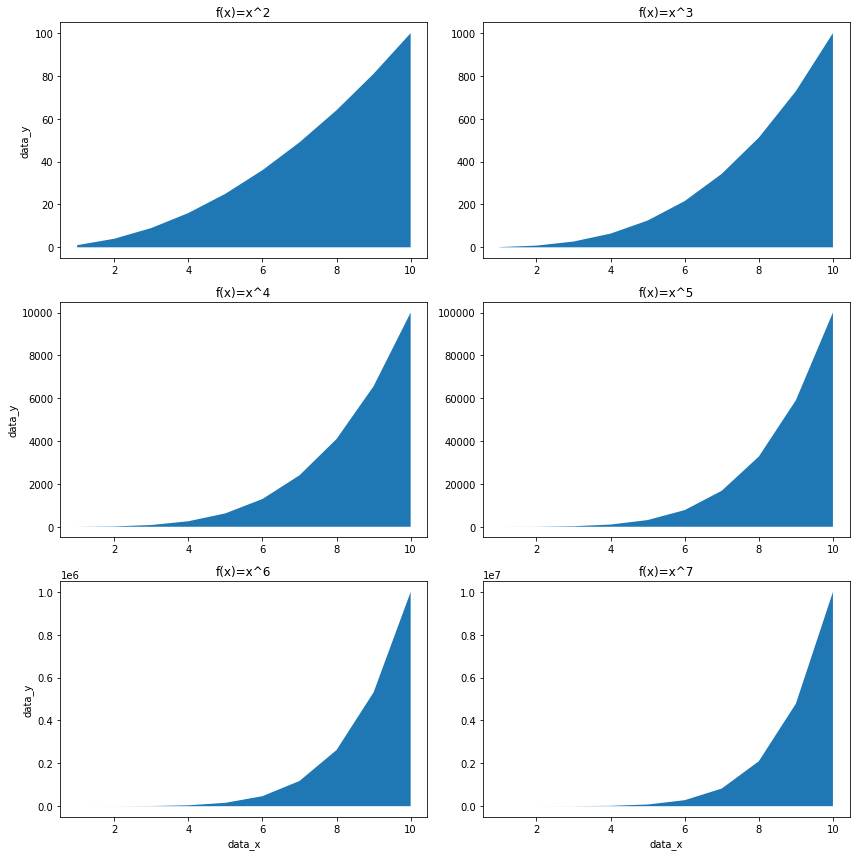

In [108]:
fig = plt.figure(figsize=(12,12))

## 1.
axes = fig.subplots(nrows=3, ncols=2)

data_x = np.linspace(1,10,10)
a,b = axes.shape

## 2.
for i in range(a*b):
  data_y = data_x**(i+2) # ^2, ^3, ... , ^7
  nrow = i // 2
  ncol = i % 2
  axes[nrow, ncol].fill_between(x=data_x, y1=data_y) # (0,0), (0,1), (1,0), (1,1), (2,0), (2,1)
  if ncol == 0:
    axes[nrow, ncol].set_ylabel('data_y')
  if nrow == 2:
    axes[nrow, ncol].set_xlabel('data_x')
  axes[nrow,ncol].set_title(f'f(x)=x^{i+2}')

plt.tight_layout()
plt.show()

### 1-4. alpha

matplotlib을 사용해 그래프를 그릴 때는 일반적으로 alpha 옵션을 통해 흐리기를 지정할 수 있습니다. 0에서 1까지의 숫자로, 1에 가까울수록 색상이 짙습니다. fill_between() 함수 역시 alpha 옵션을 지원합니다.​

alpha=0.3 정도로 영역을 흐리게 표현해주면 추후 선이나 면을 추가로 겹쳐 그리더라도 시각적으로 잘 나타낼 수 있습니다.

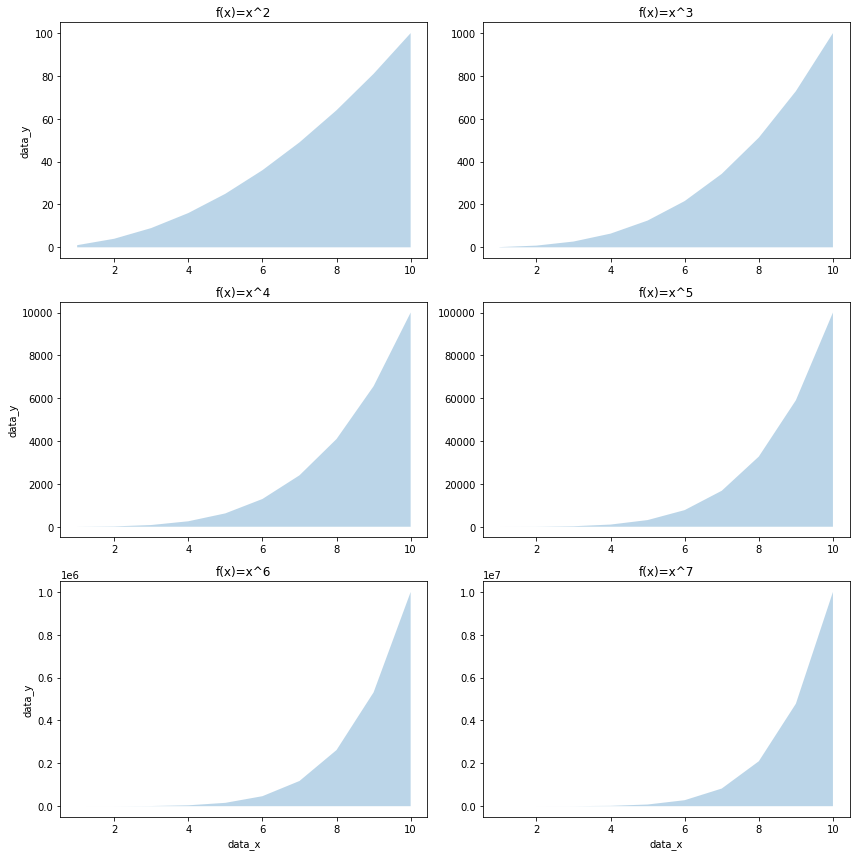

In [109]:
fig = plt.figure(figsize=(12,12))

## 1.
axes = fig.subplots(nrows=3, ncols=2)

data_x = np.linspace(1,10,10)
a,b = axes.shape

## 2.
for i in range(a*b):
  data_y = data_x**(i+2) # ^2, ^3, ... , ^7
  nrow = i // 2
  ncol = i % 2
  axes[nrow, ncol].fill_between(x=data_x, y1=data_y, alpha=0.3) # (0,0), (0,1), (1,0), (1,1), (2,0), (2,1)
  if ncol == 0:
    axes[nrow, ncol].set_ylabel('data_y')
  if nrow == 2:
    axes[nrow, ncol].set_xlabel('data_x')
  axes[nrow,ncol].set_title(f'f(x)=x^{i+2}')

plt.tight_layout()
plt.show()

### 1-5. line plot + fill_between

선을 강조하고 싶은 경우 fill_between() 함수와 plot() 함수를 함께 사용하면 됩니다.

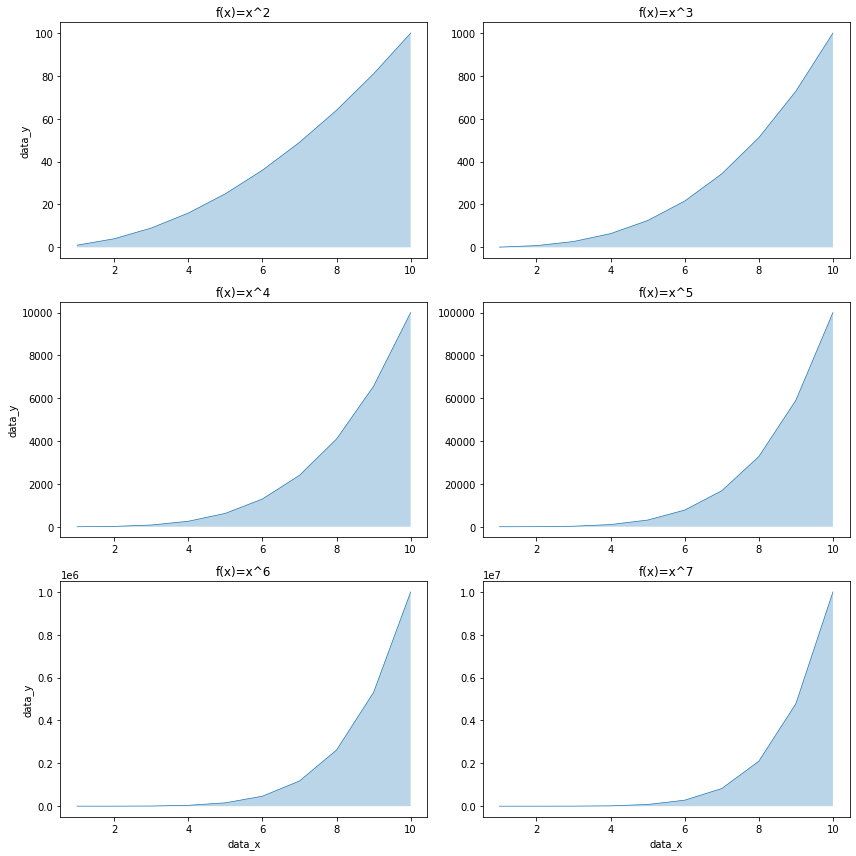

In [110]:
fig = plt.figure(figsize=(12,12))

## 1.
axes = fig.subplots(nrows=3, ncols=2)

data_x = np.linspace(1,10,10)
a,b = axes.shape

## 2.
for i in range(a*b):
  data_y = data_x**(i+2) # ^2, ^3, ... , ^7
  nrow = i // 2
  ncol = i % 2
  axes[nrow, ncol].plot(data_x, data_y, linewidth=0.7)
  axes[nrow, ncol].fill_between(x=data_x, y1=data_y, alpha=0.3) # (0,0), (0,1), (1,0), (1,1), (2,0), (2,1)
  if ncol == 0:
    axes[nrow, ncol].set_ylabel('data_y')
  if nrow == 2:
    axes[nrow, ncol].set_xlabel('data_x')
  axes[nrow,ncol].set_title(f'f(x)=x^{i+2}')

plt.tight_layout()
plt.show()

### 1-6. axvline

강조선은 axvline(), axhline()을 통해 표시할 수 있습니다. 각각은 ax + vertical + line, ax + horizontal + line의 약자로 수직선, 수평선을 의미합니다.

​
여기서도 옵션을 지정할 수 있습니다. 색상은 red로, 선 스타일은 '--'로, 흐리기는 0.6으로 설정했습니다


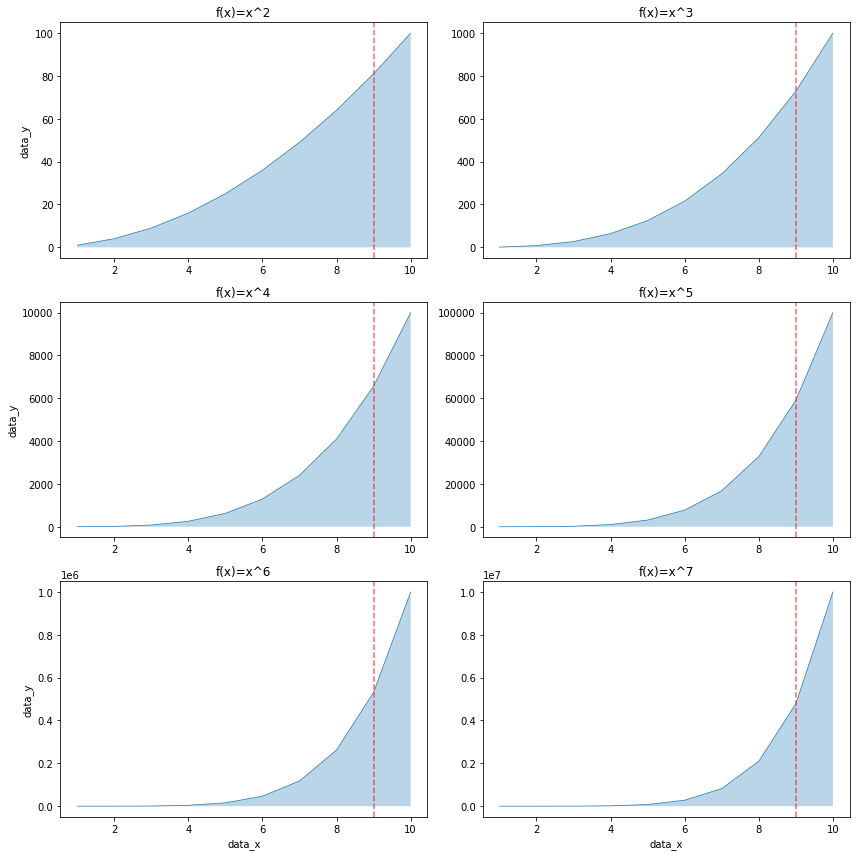

In [112]:
fig = plt.figure(figsize=(12,12))

## 1.
axes = fig.subplots(nrows=3, ncols=2)

data_x = np.linspace(1,10,10)
a,b = axes.shape

## 2.
for i in range(a*b):
  data_y = data_x**(i+2) # ^2, ^3, ... , ^7
  nrow = i // 2
  ncol = i % 2
  axes[nrow, ncol].plot(data_x, data_y, linewidth=0.7)
  axes[nrow, ncol].fill_between(x=data_x, y1=data_y, alpha=0.3) # (0,0), (0,1), (1,0), (1,1), (2,0), (2,1)
  axes[nrow, ncol].axvline(x=data_x[-2], color='r', linestyle='--', alpha=0.6)
  if ncol == 0:
    axes[nrow, ncol].set_ylabel('data_y')
  if nrow == 2:
    axes[nrow, ncol].set_xlabel('data_x')
  axes[nrow,ncol].set_title(f'f(x)=x^{i+2}')

plt.tight_layout()
plt.show()

### 1-7. axvspan

강조 영역은 axvspan(), axhspan() 함수를 사용해 표시할 수 있습니다. 각각 함수명에서 v와 h가 의미하는 바는 강조선 함수와 동일하게 vertical, horizontal이므로 기억하기 쉽습니다.

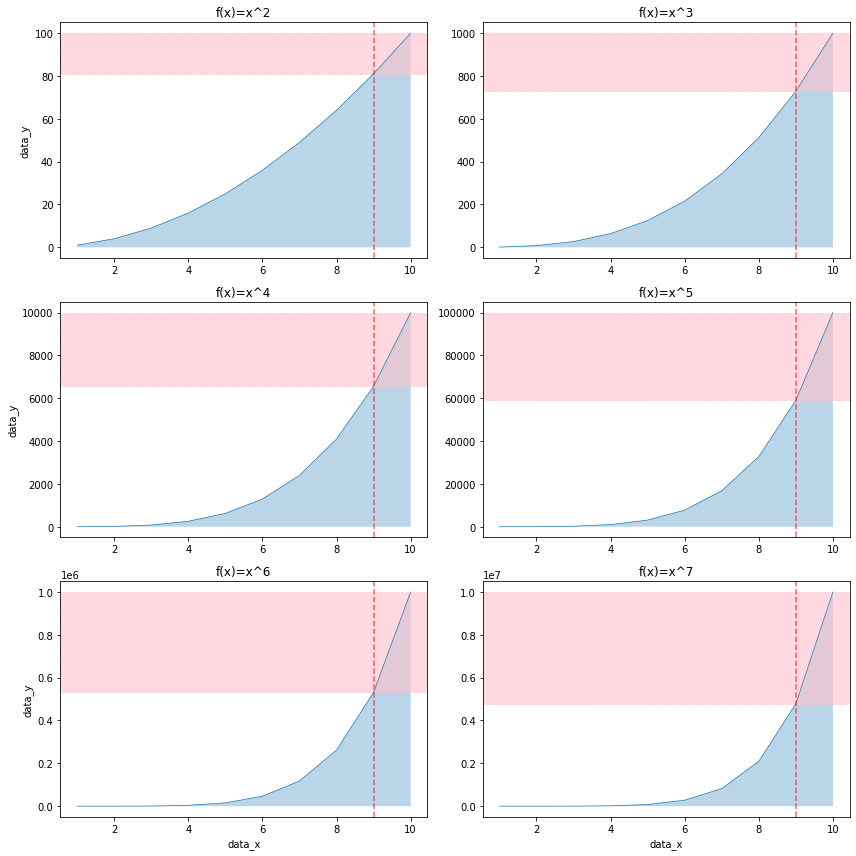

In [113]:
fig = plt.figure(figsize=(12,12))

## 1.
axes = fig.subplots(nrows=3, ncols=2)

data_x = np.linspace(1,10,10)
a,b = axes.shape

## 2.
for i in range(a*b):
  data_y = data_x**(i+2) # ^2, ^3, ... , ^7
  nrow = i // 2
  ncol = i % 2
  axes[nrow, ncol].plot(data_x, data_y, linewidth=0.7)
  axes[nrow, ncol].fill_between(x=data_x, y1=data_y, alpha=0.3) # (0,0), (0,1), (1,0), (1,1), (2,0), (2,1)
  axes[nrow, ncol].axvline(x=data_x[-2], color='r', linestyle='--', alpha=0.6)
  axes[nrow, ncol].axhspan(ymin=data_y[-2], ymax=data_y[-1], color='pink', alpha=0.6)
  if ncol == 0:
    axes[nrow, ncol].set_ylabel('data_y')
  if nrow == 2:
    axes[nrow, ncol].set_xlabel('data_x')
  axes[nrow,ncol].set_title(f'f(x)=x^{i+2}')

plt.tight_layout()
plt.show()

앞서 확인한 내용들을 종합 정리하면 다음과 같습니다.

1. subplots() 함수를 통해 전체 레이아웃을 행과 열로 n등분합니다.
2. n등분한 레이아웃이 2차원인 경우 axes[nrow, ncol], 1차원인 경우 axes[n]로 접근하며 plot() 혹은 fill_between() 함수로 선이나 면을 그립니다.
3. 이어서 axvline(), axhline(), axvspan(), axvspan() 함수로 강조선 혹은 강조 영역을 더 그려줄 수 있습니다.
4. 각 그래프에 대해 alpha로 흐리기 정도를 지정하고, linestyle로 선 스타일을 지정할 수 있으며 이외 옵션들도 색상 등 다양하게 설정할 수 있습니다.
5. 각 그래프에 대해 x축 이름, y축 이름, 그래프 이름을 설정할 수 있습니다.
6. 마지막으로 plt.show()로 전체 레이아웃을 한 번에 그려줍니다.


우리는 위 내용을 활용해 각 연도별 테슬라 주가의 평균치 영역을 그려볼 수 있습니다.

## Step 2. Time Series

In [114]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [115]:
import yfinance as yf

### 2-1. get stock data

yahoo finance 패키지를 활용해 2010년(상장 연도) ~ 2021년 말까지의 주가 정보를 수집합니다.

In [116]:
import yfinance as yf

stock = yf.Ticker('TSLA')
df = stock.history(start='2010-01-01', end='2022-01-01')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29,3.800000,5.000000,3.508000,4.778000,93831500,0,0.0
2010-06-30,5.158000,6.084000,4.660000,4.766000,85935500,0,0.0
2010-07-01,5.000000,5.184000,4.054000,4.392000,41094000,0,0.0
2010-07-02,4.600000,4.620000,3.742000,3.840000,25699000,0,0.0
2010-07-06,4.000000,4.000000,3.166000,3.222000,34334500,0,0.0
...,...,...,...,...,...,...,...
2021-12-27,1073.670044,1117.000000,1070.719971,1093.939941,23715300,0,0.0
2021-12-28,1109.489990,1119.000000,1078.420044,1088.469971,20108000,0,0.0
2021-12-29,1098.640015,1104.000000,1064.140015,1086.189941,18718000,0,0.0


### 2-2. draw yearly stock trends with subplots

차트를 그릴 대상은 2010년, 2018년, 2021년 3개 연도의 종가(Close) 데이터입니다. 시계열 데이터의 경우 index의 type이 datetime이라면 간단히 df['2010']와 같이 인덱싱해주면 해당 연도의 데이터를 모두 가져올 수 있습니다. 3개 연도 데이터를 각각의 subplot에 그릴 것이므로 3개 행, 1개 열을 지정해주고, axes[n]으로 접근합니다.

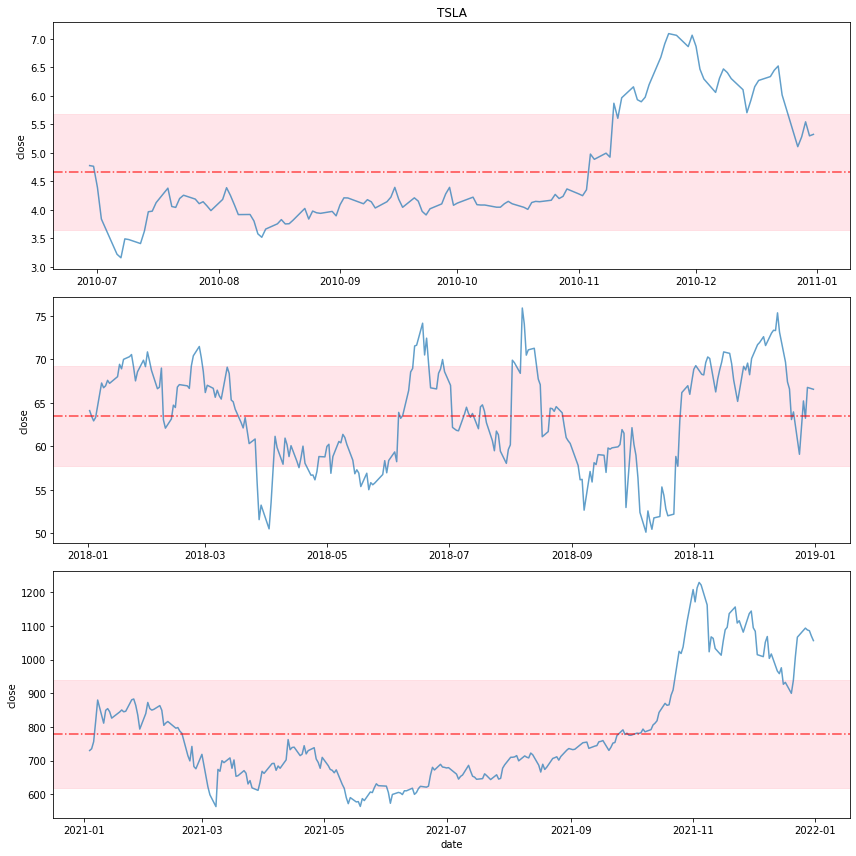

In [120]:
fig = plt.figure(figsize=(12,12))

axes = fig.subplots(nrows=3, ncols=1)

date_li = ['2010', '2018', '2021']
for i in range(3):
  data = df.loc[date_li[i],'Close']
  axes[i].plot(data.index, data.values, alpha=0.7)
  axes[i].axhline(y=data.values.mean(), color='r', alpha=0.7, linestyle='-.')
  axes[i].axhspan(ymin=data.values.mean()-data.values.std(),
                  ymax=data.values.mean()+data.values.std(),
                  alpha=0.4,
                  color='pink')
  if i == 0:
    axes[i].set_title('TSLA')
  elif i == 2:
    axes[i].set_xlabel('date')
  axes[i].set_ylabel('close')

plt.tight_layout()
plt.show()



이렇게 단순히 연도별 평균만 강조선으로 그리기보다 평균 +/- 표준편차를 표시해 줌으로써 특정 날짜의 주가가 연도별 평균치를 유의미하게 상회하는지, 하회하는지를 확인할 수 있습니다.

이하 내용은 `Ch 02`에서 다루는 시계열 분해 관련 내용입니다. 해당 챕터를 참고해주세요.

### 2-3. time series decomposition

In [123]:
data

Date
2021-01-04     729.770020
2021-01-05     735.109985
2021-01-06     755.979980
2021-01-07     816.039978
2021-01-08     880.020020
                 ...     
2021-12-27    1093.939941
2021-12-28    1088.469971
2021-12-29    1086.189941
2021-12-30    1070.339966
2021-12-31    1056.780029
Name: Close, Length: 252, dtype: float64

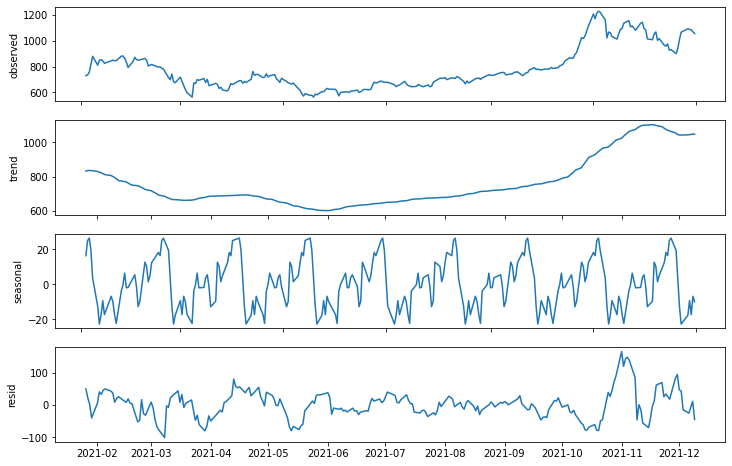

In [149]:
from statsmodels.tsa.seasonal import seasonal_decompose

res = seasonal_decompose(data, freq=30)

fig = plt.figure(figsize=(12, 8))
axes = fig.subplots(nrows=4, ncols=1)

axes[0].plot(res.observed)
axes[0].set_xticklabels([])
axes[0].set_ylabel('observed')

axes[1].plot(res.trend)
axes[1].set_xticklabels([])
axes[1].set_ylabel('trend')

axes[2].plot(res.seasonal)
axes[2].set_xticklabels([])
axes[2].set_ylabel('seasonal')

axes[3].plot(res.resid)
axes[3].set_ylabel('resid')

plt.show()

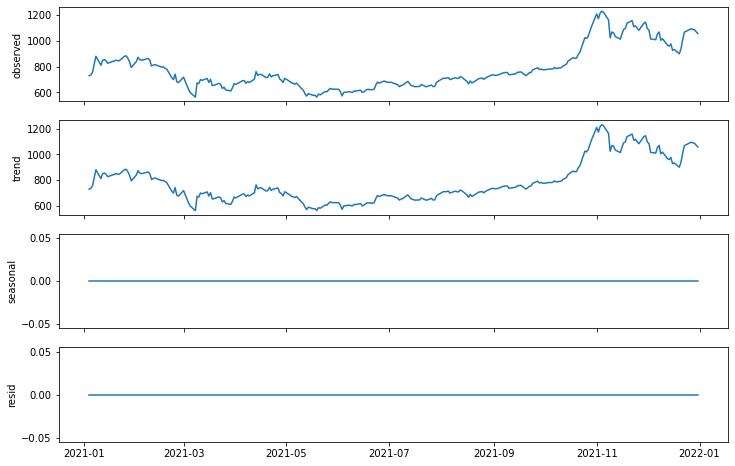

In [152]:
# freq : seasonal 주기
res = seasonal_decompose(data, freq=1)

fig = plt.figure(figsize=(12, 8))
axes = fig.subplots(nrows=4, ncols=1)

axes[0].plot(res.observed)
axes[0].set_xticklabels([])
axes[0].set_ylabel('observed')

axes[1].plot(res.trend)
axes[1].set_xticklabels([])
axes[1].set_ylabel('trend')

axes[2].plot(res.seasonal)
axes[2].set_xticklabels([])
axes[2].set_ylabel('seasonal')

axes[3].plot(res.resid)
axes[3].set_ylabel('resid')

plt.show()

In [155]:
def show_decomp(data, freq_n, name):
  res = seasonal_decompose(data, freq=freq_n)

  fig = plt.figure(figsize=(12, 8))
  axes = fig.subplots(nrows=4, ncols=1)

  axes[0].plot(res.observed)
  axes[0].set_xticklabels([])
  axes[0].set_ylabel('observed')
  axes[0].set_title(f'{name}')

  axes[1].plot(res.trend)
  axes[1].set_xticklabels([])
  axes[1].set_ylabel('trend')

  axes[2].plot(res.seasonal)
  axes[2].set_xticklabels([])
  axes[2].set_ylabel('seasonal')

  axes[3].plot(res.resid)
  axes[3].set_ylabel('resid')

  plt.show()

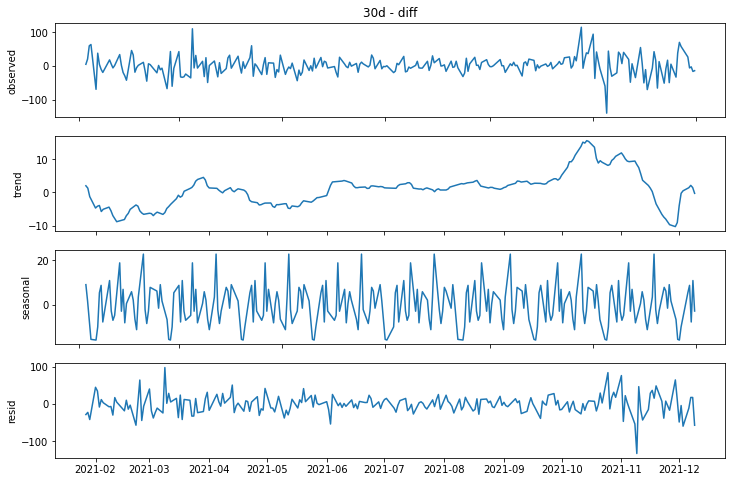

In [157]:
show_decomp(data.diff().dropna(), freq_n=30, name='30d - diff')

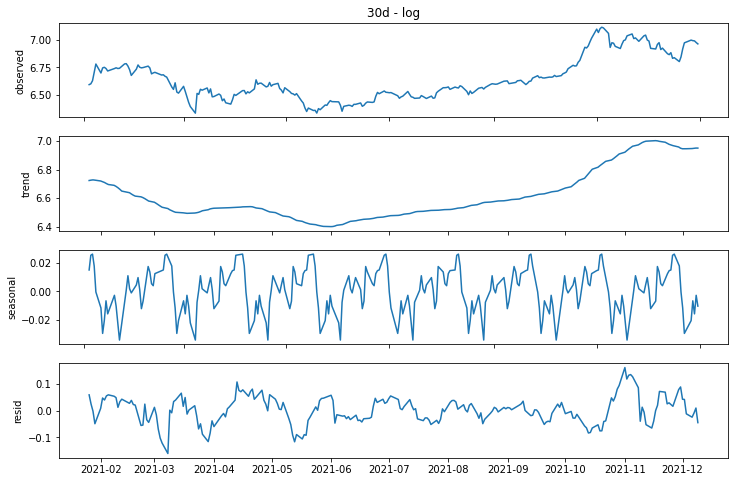

In [163]:
show_decomp(np.log(data), freq_n=30, name='30d - log')

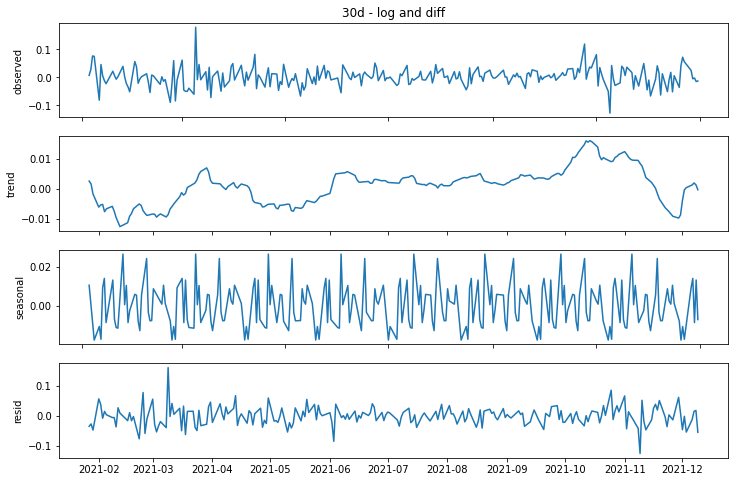

In [162]:
show_decomp(np.log(data).diff().dropna(), freq_n=30, name='30d - log and diff')

### 2-4. auto-correlation, partial auto-correlation

In [164]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [165]:
data

Date
2021-01-04     729.770020
2021-01-05     735.109985
2021-01-06     755.979980
2021-01-07     816.039978
2021-01-08     880.020020
                 ...     
2021-12-27    1093.939941
2021-12-28    1088.469971
2021-12-29    1086.189941
2021-12-30    1070.339966
2021-12-31    1056.780029
Name: Close, Length: 252, dtype: float64

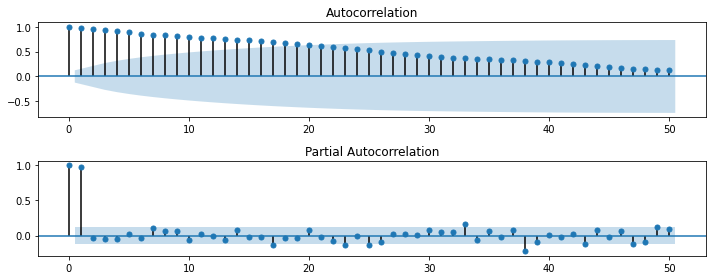

In [170]:
fig = plt.figure(figsize=(10,4))

axes = fig.subplots(nrows=2, ncols=1)
plot_acf(data, lags=50, ax=axes[0])
plot_pacf(data, lags=50, ax=axes[1])

plt.tight_layout()
plt.show()

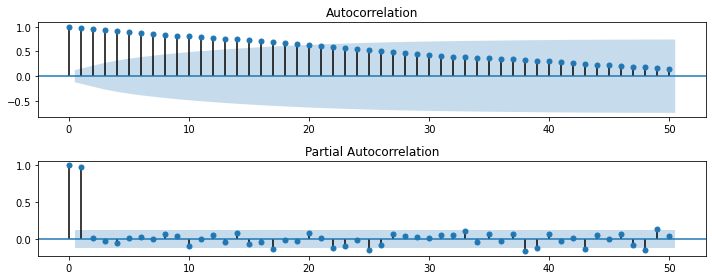

In [171]:
fig = plt.figure(figsize=(10,4))

axes = fig.subplots(nrows=2, ncols=1)
plot_acf(np.log(data), lags=50, ax=axes[0])
plot_pacf(np.log(data), lags=50, ax=axes[1])

plt.tight_layout()
plt.show()

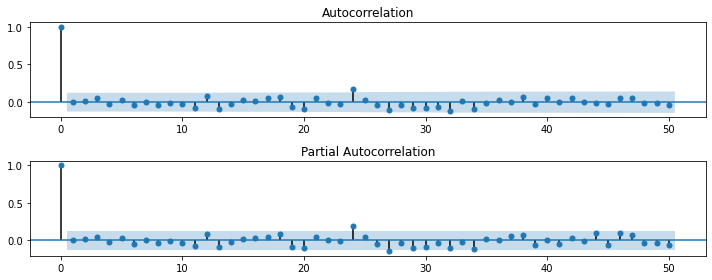

In [173]:
fig = plt.figure(figsize=(10,4))

axes = fig.subplots(nrows=2, ncols=1)
plot_acf(data.diff()[1:], lags=50, ax=axes[0])
plot_pacf(data.diff()[1:], lags=50, ax=axes[1])

plt.tight_layout()
plt.show()

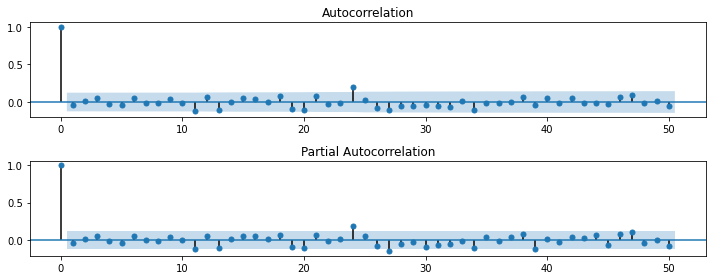

In [172]:
fig = plt.figure(figsize=(10,4))

axes = fig.subplots(nrows=2, ncols=1)
plot_acf(np.log(data).diff()[1:], lags=50, ax=axes[0])
plot_pacf(np.log(data).diff()[1:], lags=50, ax=axes[1])

plt.tight_layout()
plt.show()